
# Predicting the Price of Used Cars Using Machine Learning Algorithms
<font color = 'Blue'> 
Names: Shin Le, Jeongyeon Kim, Benjamin Horvath, Nico Reategui, Paul Giglio




Proposal: https://docs.google.com/document/d/1zhQrkWmJjjMU6wIfBC78MygGzp-XUrkaUOWALfyAL9Q/edit

Dataset: 
* https://www.kaggle.com/datasets/wspirat/germany-used-cars-dataset-2023/data
    
* https://www.kaggle.com/datasets/andreinovikov/used-cars-dataset

<a id="0"></a> <br>
<font color = 'Blue'> 
# Table of Contents
1. [Importing Libraries](#1)
1. [Loading Cleaned Dataset](#6)
1. [Data Splitting](#7)
1. [Models Evaluations and Predictions](#8)
   1. [*Full Model* with *Linear Regression*](#81)
      1. [Using Sequential Feature Selection for the *Linear Regression*](#811)
   1. [*Decision Tree*](#82)
      1. [*A Pruned Tree*](#821)
   1. [Ensemble Method: *Random Forest Regression*](#83)
   1. [Ensemble Method: *Gradient Boosting Regression*](#84)
   1. [*Support Vector Machine* (SVM)](#85)
   1. [Evaluation](#86)

<a id="1"></a>
<font color = 'blue'> 
## **1. Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline  # Ensures that Matplotlib plots are displayed inline

import statsmodels.api as sm


#preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder 


UsageError: unrecognized arguments: # Ensures that Matplotlib plots are displayed inline


In [13]:


# Define the URL of the CSV file on GitHub
csv_url = "https://raw.githubusercontent.com/syl21b/Car-Price-Prediction/main/cleaned_data.csv?token=GHSAT0AAAAAACIQMGDUJR3QO4OSGJ5VQIK2ZKFUKDA"

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_url)

In [14]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
#numerical_cols.remove('Senior Citizen')
num_columns=df[numerical_cols]

In [15]:
Q1 = num_columns[numerical_cols].quantile(0.25)
Q3 = num_columns[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers and create a boolean mask
outliers_mask = (num_columns[numerical_cols] < lower_bound) | (num_columns[numerical_cols] > upper_bound)

# Drop the rows containing outliers
df = df[~outliers_mask]


In [16]:
df

,manufacturer,year,mileage,transmission,drivetrain,fuel_type,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price,Engine Displacement (L),Engine Type,Engine Features,City MPG,Highway MPG
0,NaN,2023.0,6.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,4.900000,4.6,5.0,37434.0,1.5,NaN,NaN,29.0,36.0
1,NaN,2023.0,10805.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,4.500000,4.6,5.0,37500.0,1.5,NaN,NaN,26.0,36.0
2,NaN,2023.0,3742.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,4.159732,4.6,5.0,38995.0,1.5,NaN,NaN,26.0,36.0
3,NaN,2023.0,5489.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,3.900000,4.6,5.0,34990.0,1.5,NaN,NaN,29.0,36.0
4,NaN,2023.0,6854.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,4.159732,4.6,5.0,36946.0,1.5,NaN,NaN,26.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141477,NaN,NaN,21949.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,NaN,4.7,4.0,26994.0,5.7,NaN,NaN,17.0,25.0
141478,NaN,NaN,12825.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,NaN,4.4,9.0,18987.0,3.2,NaN,NaN,18.0,26.0
141479,NaN,NaN,132069.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,3.700000,4.3,4.0,2990.0,1.6,NaN,NaN,29.0,37.0
141480,NaN,NaN,29590.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,4.159732,4.6,17.0,32895.0,3.0,NaN,NaN,19.0,25.0


In [5]:
cat_columns= df.select_dtypes(include=['object']).columns.tolist()
cat_columns

['manufacturer',
 'transmission',
 'drivetrain',
 'fuel_type',
 'exterior_color',
 'interior_color',
 'Engine Type',
 'Engine Features']

In [6]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Encode each categorical column
for col in cat_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Your DataFrame now contains the encoded values
df

,manufacturer,year,mileage,transmission,drivetrain,fuel_type,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price,Engine Displacement (L),Engine Type,Engine Features,City MPG,Highway MPG
0,0,2023.0,6.0,0,0,0,0,0,0.0,0.0,0.0,4.900000,4.6,5.0,37434.0,1.5,0,0,29.0,36.0
1,0,2023.0,10805.0,0,0,0,0,0,0.0,1.0,0.0,4.500000,4.6,5.0,37500.0,1.5,0,0,26.0,36.0
2,0,2023.0,3742.0,0,0,0,0,0,0.0,1.0,0.0,4.159732,4.6,5.0,38995.0,1.5,0,0,26.0,36.0
3,0,2023.0,5489.0,0,0,0,0,0,0.0,1.0,1.0,3.900000,4.6,5.0,34990.0,1.5,0,0,29.0,36.0
4,0,2023.0,6854.0,0,0,0,0,0,0.0,1.0,1.0,4.159732,4.6,5.0,36946.0,1.5,0,0,26.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141477,0,NaN,21949.0,0,0,0,0,0,0.0,0.0,1.0,NaN,4.7,4.0,26994.0,5.7,0,0,17.0,25.0
141478,0,NaN,12825.0,0,0,0,0,0,0.0,1.0,0.0,NaN,4.4,9.0,18987.0,3.2,0,0,18.0,26.0
141479,0,NaN,132069.0,0,0,0,0,0,0.0,0.0,0.0,3.700000,4.3,4.0,2990.0,1.6,0,0,29.0,37.0
141480,0,NaN,29590.0,0,0,0,0,0,0.0,0.0,1.0,4.159732,4.6,17.0,32895.0,3.0,0,0,19.0,25.0


In [7]:
'''Q1 = num_columns[numerical_cols].quantile(0.25)
Q3 = num_columns[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers and create a boolean mask
outliers_mask = (num_columns[numerical_cols] < lower_bound) | (num_columns[numerical_cols] > upper_bound)

# Drop the rows containing outliers
num_columns = num_columns[~outliers_mask]'''

'Q1 = num_columns[numerical_cols].quantile(0.25)\nQ3 = num_columns[numerical_cols].quantile(0.75)\nIQR = Q3 - Q1\n\n# Define the lower and upper bounds for outliers\nlower_bound = Q1 - 1.5 * IQR\nupper_bound = Q3 + 1.5 * IQR\n\n# Identify outliers and create a boolean mask\noutliers_mask = (num_columns[numerical_cols] < lower_bound) | (num_columns[numerical_cols] > upper_bound)\n\n# Drop the rows containing outliers\nnum_columns = num_columns[~outliers_mask]'

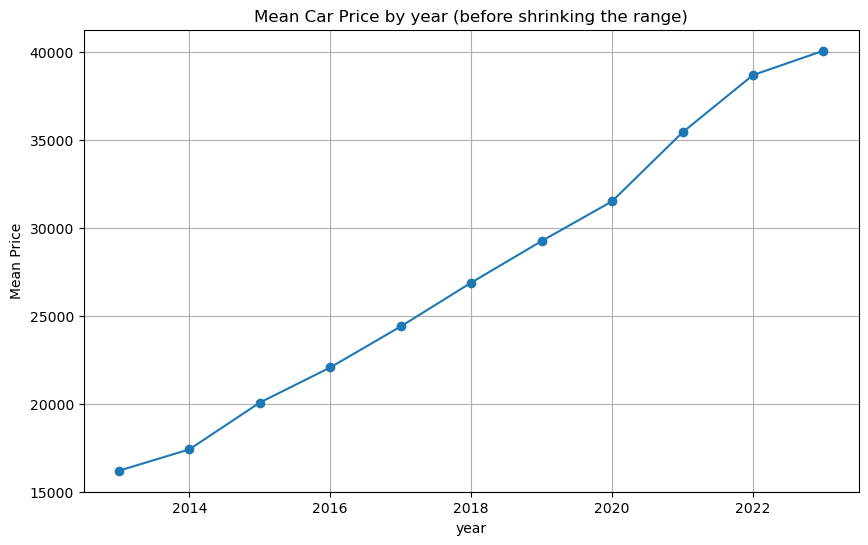

In [8]:
def plot_year_vs_Price (df):
    mean_prices_by_year = df.groupby('year')['price'].mean().reset_index()

    plt.figure(figsize=(10, 6))
    plt.plot(mean_prices_by_year['year'], mean_prices_by_year['price'], marker='o', linestyle='-')
    plt.title('Mean Car Price by year (before shrinking the range)')
    plt.xlabel('year')
    plt.ylabel('Mean Price')
    plt.grid(True)
    plt.show()

plot_year_vs_Price (df)

In [9]:
# Shuffle the rows of the DataFrame randomly
df_shuffled = df.sample(frac=1, random_state=2)  # Use a random_state for reproducibility

# Split the shuffled DataFrame into four equal-sized pieces
df_pieces = np.array_split(df_shuffled, 2)

In [10]:
reset_df_pieces = []  # Create a list to store the DataFrames with reset index

for i in range(3):
    reset_df = df_pieces[i].reset_index(drop=True)  # Reset the index and drop the old index column
    reset_df_pieces.append(reset_df)  # Append the reset DataFrame to the list

# Now, reset_df_pieces contains the DataFrames with reset index

IndexError: list index out of range

In [ ]:
reset_df_pieces[1]

In [ ]:
plot_year_vs_Price (reset_df_pieces[0])
plot_year_vs_Price (reset_df_pieces[1])
plot_year_vs_Price (reset_df_pieces[2])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [ ]:
# Split the dataset into four smaller datasets
X_train1, X_test1, y_train1, y_test1 = train_test_split(reset_df_pieces[0].drop('price', axis=1), reset_df_pieces[0]['price'], test_size=0.25, random_state=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(reset_df_pieces[1].drop('price', axis=1), reset_df_pieces[1]['price'], test_size=0.25, random_state=2)
X_train3, X_test3, y_train3, y_test3 = train_test_split(reset_df_pieces[2].drop('price', axis=1), reset_df_pieces[2]['price'], test_size=0.25, random_state=3)
X_train4, X_test4, y_train4, y_test4 = train_test_split(reset_df_pieces[3].drop('price', axis=1), reset_df_pieces[3]['price'], test_size=0.25, random_state=4)


In [ ]:
# Create linear regression models
model1 = LinearRegression()
model2 = LinearRegression()
model3 = LinearRegression()
model4 = LinearRegression()

# Train the models on the smaller datasets
model1.fit(X_train1, y_train1)
model2.fit(X_train2, y_train2)
model3.fit(X_train3, y_train3)
model4.fit(X_train4, y_train4)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on the test sets
y_pred1 = model1.predict(X_test1)
y_pred2 = model2.predict(X_test2)
y_pred3 = model3.predict(X_test3)
y_pred4 = model4.predict(X_test4)

# Calculate evaluation metrics
mae1 = mean_absolute_error(y_test1, y_pred1)
mse1 = mean_squared_error(y_test1, y_pred1)
r2_1 = r2_score(y_test1, y_pred1)

mae2 = mean_absolute_error(y_test2, y_pred2)
mse2 = mean_squared_error(y_test2, y_pred2)
r2_2 = r2_score(y_test2, y_pred2)

mae3 = mean_absolute_error(y_test3, y_pred3)
mse3 = mean_squared_error(y_test3, y_pred3)
r2_3 = r2_score(y_test3, y_pred3)

mae4 = mean_absolute_error(y_test4, y_pred4)
mse4 = mean_squared_error(y_test4, y_pred4)
r2_4 = r2_score(y_test4, y_pred4)

# Print or store the evaluation results
print("Model 1 MAE:", mae1)
print("Model 1 MSE:", mse1)
print("Model 1 R2:", r2_1)

print("Model 2 MAE:", mae2)
print("Model 2 MSE:", mse2)
print("Model 2 R2:", r2_2)


print("Model 3 MAE:", mae3)
print("Model 3 MSE:", mse3)
print("Model 3 R2:", r2_3)

print("Model 4 MAE:", mae4)
print("Model 4 MSE:", mse4)
print("Model 4 R2:", r2_4)


In [ ]:
train_data=reset_df_pieces[1].copy()
test_data=reset_df_pieces[3].copy()

In [ ]:
train_data.shape

In [ ]:
train_data

In [ ]:
test_data.shape

In [ ]:
for i in range(0,4):
    plot_year_vs_Price (reset_df_pieces[i])